# Principal Component Analysis (PCA)

### What is PCA and what is the need for it?

High dimensional data is extremely complex to process due to inconsistencies in the features which increase the computational time and it makes data processing and EDA more convoluted.

**Principal Component Analysis**, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensions of large data sets, by transforming a large set of variables into a smaller one that enables us to identify correlations and patterns in a data set without loss of any important information.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to **trade a little accuracy for simplicity**. Smaller data sets are easier to explore & visualize, and make analyzing data much simpler and faster for machine learning algorithms without extraneous variables to process.

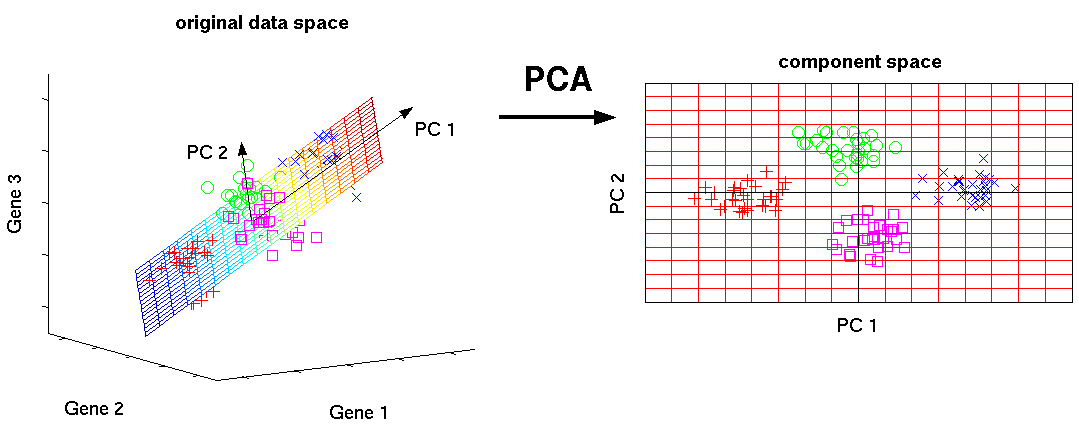

        Ref: http://phdthesis-bioinformatics-maxplanckinstitute-molecularplantphys.matthias-scholz.de/ 

### Steps involved in PCA:

1. **Standardize** the data. (with Mean = 0 and Variance = 1)
$$Z = \frac{x_i - \bar{x}}{\sigma}$$
2. Compute the **Covariance matrix** of dimensions:  It expresses the correlation between the different variables in the data set. It is essential to identify heavily dependent variables because they contain biased and redundant information which reduces the overall performance of the model.
3. Obtain the **Eigenvectors and Eigenvalues** from the covariance matrix: The Eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude.
4. **Sort eigenvalues** in descending order and choose the top $k$ Eigenvectors that correspond to the $k$ largest eigenvalues ($k$ will become the number of dimensions of the new feature subspace $k \leq d$, where $d$ is the number of original dimensions).
5. Construct the **projection matrix** $W$ from the selected $k$ Eigenvectors.
6. **Transform** the original data set $X$ via $W$ to obtain the new $k$-dimensional feature subspace $Y$.

### Goal: 

It is hoped, in general, that most of the variation in $\mathrm{x}$ will be accounted for by $m$ Principal Components where $m<<p$.

### An Example: Differentiate good quality wine from the bad one

**Wine** (from Latin vinum) is an alcoholic beverage made from grapes, generally Vitis vinifera, fermented without the addition of sugars, acids, enzymes, water, or other nutrients.

Yeast consumes the sugar in the grapes and converts it to ethanol and carbon dioxide. Different varieties of grapes and strains of yeasts produce different styles of wine. These variations result from the complex interactions between the biochemical development of the grape, the reactions involved in fermentation, the terroir, and the production process. Many countries enact legal appellations intended to define styles and qualities of wine. These typically restrict the geographical origin and permitted varieties of grapes, as well as other aspects of wine production. Wines not made from grapes include rice wine and fruit wines such as plum, cherry, pomegranate and elderberry. Wine has been produced for thousands of years. The earliest known traces of wine are from China , Georgia ,Iran ,and Sicily.

Dataset Source: https://github.com/nthun/courses-multivariate-statistics-in-R-2017-fall/blob/master/datasets%2Fwines.csv

**Physicohemical Properties provided in the dataset:**

* Volatile Acidity: The amount of acetic acid in wine, which at high levels can lead to an unpleasant, vinegar taste (acetic acid - g / dm^3)

* pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)

* Alcohol: The percent alcohol content of the wine (% by volume) 

* Quality (based on sensory data): Quality label(score between 3 to 8) 


**This notebook aims to visually differentiate good quality wines from the bad ones using K-means clustering but first using PCA as preprocessing step for dimensionality reduction.**

`Ref for the code:` [SWJ] Listing 9.15 https://github.com/h-Klok/StatsWithJuliaBook/blob/master/9_chapter/pca.jl

In [1]:
# Importing Julia and Python libraries
using Statistics, MultivariateStats, RDatasets, LinearAlgebra, CSV, Plots; pyplot() #PyPlot backend
df = CSV.read("C:\\Users\\lalit\\OneDrive\\Desktop\\MDS Project\\wines.csv");

In [2]:
# Removing space from the column name "volatile acidity" and replacing it with ":volatile_acidity"
rename!(df, :"volatile acidity" => :volatile_acidity)
head(df)

,quality,pH,volatile_acidity,alcohol
,Int64,Float64,Float64,Float64
1,5,3.51,0.7,9.4
2,5,3.2,0.88,9.8
3,5,3.26,0.76,9.8
4,6,3.16,0.28,9.8
5,5,3.51,0.7,9.4
6,5,3.51,0.66,9.4


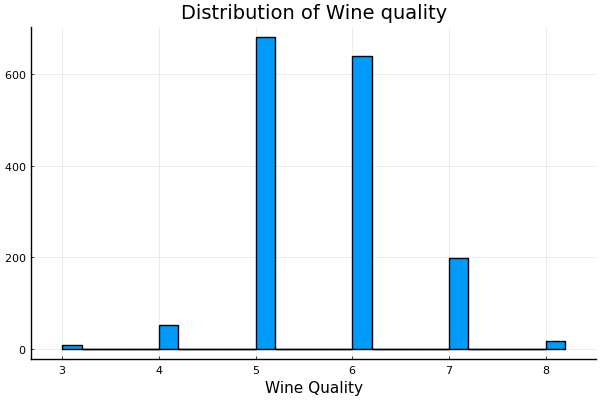

In [3]:
# Distribution of wine quality found in the dataset
histogram(df[:,1], title = "Distribution of Wine quality", xlabel="Wine Quality", legend=:none)

Filtering wines with quality labelled 4 and 8 only. <br>
**4 being the very bad quality wine and 8 being the very good quality wine.**

In [4]:
df = df[[in(v, [4,8]) for v in df[:1]], :]; # Filtering for rows containing wines with quality labelled 4 and 8 only.
Set(df[:,1]) # To get unique elements in the first column i.e quality column

Set{Int64} with 2 elements:
  8
  4

In [5]:
df = df[:,[:pH,:volatile_acidity, :alcohol]]; #Removing "quality" column
x = convert(Array{Float64,2},df)' #converting df from type dataframe to type array

3×71 Adjoint{Float64,Array{Float64,2}}:
 3.38  3.5   3.26   3.9   3.31   3.16   …   3.66   3.33   3.53  3.39   3.24
 0.59  1.13  0.61   0.52  0.675  0.625      0.62   0.58   0.91  0.48   0.36
 9.0   9.8   9.3   13.1   9.2    9.1       10.1   10.3   10.9   9.05  11.4

In [6]:
# Performing PCA over the data given in a matrix x. Each column of x is an observation which determines the wine quality.
model = fit(PCA, x) #Function from MultivariateStats package

PCA(indim = 3, outdim = 3, principalratio = 1.0000000000000002)

In [7]:
# projection() function returns a matrix where each column is a principal component.
M = projection(model) # Function from the MultivariateStats

3×3 Array{Float64,2}:
  0.0409192  0.551034     0.833479
 -0.0371497  0.83444     -0.549845
  0.998472   0.00846426  -0.0546154

In [8]:
model

PCA(indim = 3, outdim = 3, principalratio = 1.0000000000000002)

In [9]:
# Creates a matrix with columns as principal components, similar to the matrix M
function manualProjection(x)
    covMat = cov(x') #Since Julia covaraince function expects n x p; Computing the sample covariance matrix of the data x
    ev = eigvals(covMat) # Computing its eigenvalues
    eigOrder = sortperm(eigvals(covMat),rev=true) # returns the permutation of eigenvalues from highest to smallest
    eigvecs(covMat)[:,eigOrder] # Computing corresponding eigenvectors
end
# The covariance matrix is guaranteed to be symmetric and hence, the eigenvalues are real.

manualProjection (generic function with 1 method)

In [10]:
manualProjection(x) 

3×3 Array{Float64,2}:
  0.0409192  0.551034     0.833479
 -0.0371497  0.83444     -0.549845
  0.998472   0.00846426  -0.0546154

In [11]:
# Print the maximum absolute difference of entries
println("Manual vs. package: ",maximum(abs.(M-manualProjection(x)))) 

Manual vs. package: 5.551115123125783e-16


The output illustrates that our manual computation using a covariance matrix agrees with the computation carried out by the fit(PCA,...) function.

In [12]:
pcVar = principalvars(model) ./ tvar(model) 
# principalvars() returns the variances associated with each principal component 
# These values are then normalized by dividing by the scalar tvar(model)

3-element Array{Float64,1}:
 0.9502758044806663
 0.038631155391149176
 0.011093040128184623

In [13]:
cumVar = cumsum(pcVar) # Accumulating values

3-element Array{Float64,1}:
 0.9502758044806663
 0.9889069598718154
 1.0

In [14]:
pcDat = M[:,1:2]'*x 
# using two principal components and hence selecting the first two columns of M via 1:2

2×71 Array{Float64,2}:
 9.10263  9.88626  9.39652  13.2202   9.29631  …  10.994    9.15705  11.5018
 2.43099  2.95449  2.3841    2.69382  2.46504      2.79675  2.34514   2.18224

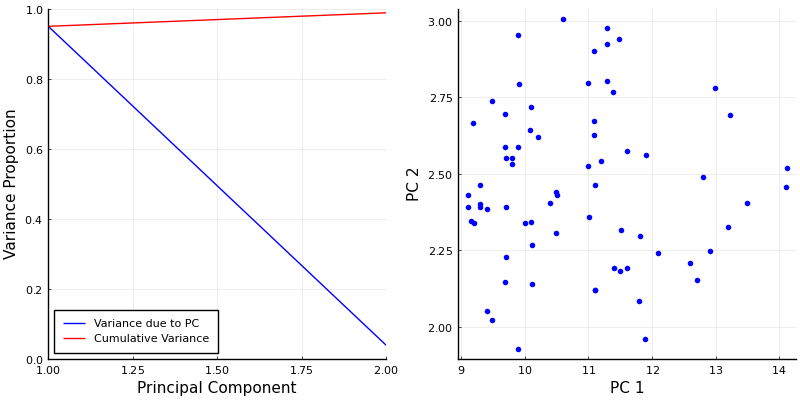

In [15]:
p1 = plot(pcVar, c=:blue, label="Variance due to PC")
	plot!(1:length(cumVar), cumVar, label="Cumulative Variance", c=:red, 
        xlabel="Principal Component",ylabel="Variance Proportion",ylims=(0,1), xlims=(1,2)) # scree plot
p2 = scatter(pcDat[1,:],pcDat[2,:], c=:blue, xlabel="PC 1", ylabel="PC 2",
            msw=0, legend=:none) # scatter plot of the transformed coordinates based on their principal components
plot(p1, p2, size=(800,400))

**To visualize two classes of wine quality let's try to cluster the dimentionally reduced scatter plot consisting of principal components using $k-$ means** where we assume that the data points, $x_{1}, \ldots, x_{n}$ are vectors in $p-$dimensional Euclidean space. We then specify a number $k$, determining the number of clusters that we wish to find. We then seek the function $c(x)$ (or n partition $C_{1}, \ldots, C_{k}$ ) together with means of clusters, $J_{1, \ldots \ldots} J_{k.}$ The ideal aim is to minimize,

$$
\sum_{\ell=1}^{k} \sum_{x \in C_{\ell}}\left\|x-J_{\ell}\right\|^{2}                   ------>(1)
$$

Such a minimization is generally computationally difficult, however it can be approximately achieved via the $k$-means algorithm. It separates the problem into two sub-problems or sub-tasks, mean computation, and labelling.

**Mean computation:** Given $c(x),$ finding the means $J_{1}, \ldots, J_{k}$ is simply done by setting,

$$
J_{\ell}=\frac{1}{\left|C_{\ell}\right|} \sum_{x \in C_{\ell}} x, \quad \text { for } \quad \ell=1, \ldots, k. ------>(2)
$$

This is the element-wise average over all the vectors in $C_{\ell}$ where each of the $p$ coordinates is averaged separately. Each of the means $J_{\ell}$ is called a centroid for cluster $\ell.$

**Labelling:** Given, $J_{1}, \ldots, J_{k}$ finding $c(x)$ that minimizes $(1)$ is done by setting,

$$
c(x)=\operatorname{argmin}_{\ell}\left\|x-J_{\ell}\right\| ------>(3)
$$

That is, the label of each element is determined by the closest controid in Euclidean space.

The $k-$ means algorithm operates by iterating over the mean computation step $(2)$, followed by the labelling step $(3)$. This is done until no more changes are made to the labels and the means.

        Ref Book: SWJ [Pg. 400] - Clustering with k-Means

In [16]:
# Constructing a dataframe for clustering
X = [pcDat[1,:] pcDat[2,:]]'
df = convert(DataFrame, X');

`Ref for the code:` [SWJ] Listing 9.12 - Carrying out k-means via the Clustering package

In [17]:
using Clustering, Random, Measures; 
Random.seed!(0) # Setting 0 as seed value

K = 2 #number of clusters

seeds = initseeds(:rand, X, K); #sets seeds as 2 randomly selected data points
XKmeans = kmeans(X, K, init = seeds); #using k-means function from Clustering library

In [18]:
println("Number of clusters: ", nclusters(XKmeans)) # to query the clustering result on the number of cluster
println("Counts of clusters: ", counts(XKmeans)) # to query how many data points are in each cluster

Number of clusters: 2
Counts of clusters: [35, 36]


In [19]:
df.Group  = assignments(XKmeans) # to find out the cluster id of each observation
head(df)

,x1,x2,Group
,Float64,Float64,Int64
1,9.10263,2.43099,2
2,9.88626,2.95449,2
3,9.39652,2.3841,2
4,13.2202,2.69382,1
5,9.29631,2.46504,2
6,9.19218,2.33982,2


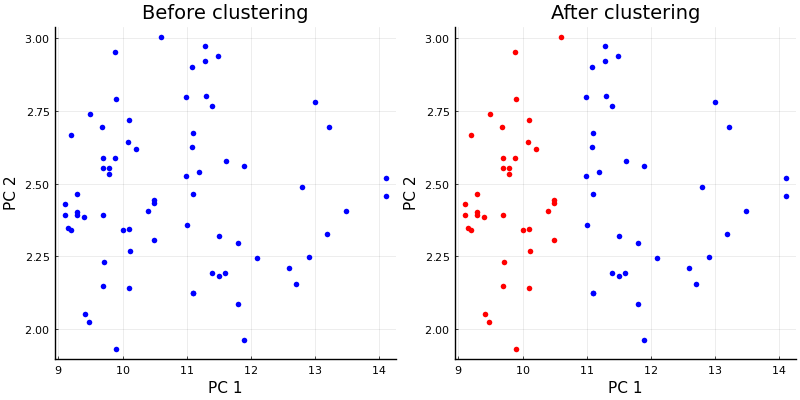

In [20]:
p1 = scatter(pcDat[1,:],pcDat[2,:], c=:blue, xlabel="PC 1", ylabel="PC 2",
            msw=0, title = "Before clustering", legend=:none)
p2 = scatter( df[df.Group .== 1, :x1], df[df.Group .== 1, :x2], c=:blue, msw=0)
     scatter!( df[df.Group .== 2, :x1], df[df.Group .== 2, :x2], c=:red, msw=0, 
               xlabel="PC 1", ylabel="PC 2", title = "After clustering")
plot(p1, p2, size=(800,400), legend=:none)

**We can see from the above plot that there exists two classes i.e. bad quality wine and the good quality wine clearly separated.**

**Project by:** <br> 
Lalith Veerabhadrappa Badiger <br>
Student ID: 46557829